In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.base import clone
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
sns.set()

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
# simple linear regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.93926537]), array([[2.9579131]]))

In [4]:
X_new = np.array([[0], [2]])

In [5]:
lin_reg.predict(X_new)

array([[3.93926537],
       [9.85509158]])

In [6]:
# Linear Regression using Stochastic Gradient descent
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [7]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.92180176]), array([2.90249294]))

In [8]:
# Non linear data generate
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

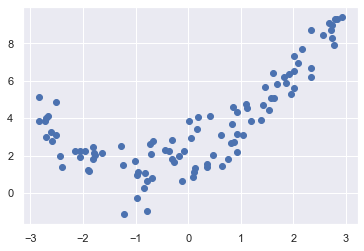

In [9]:
plt.scatter(X,y)

In [10]:
# Non linear Regression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [11]:
X[0]

array([-1.91027383])

In [12]:
X_poly[0]

array([-1.91027383,  3.64914611])

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.91006742]), array([[1.02346486, 0.58040358]]))

[-3, 3, 0, 10]

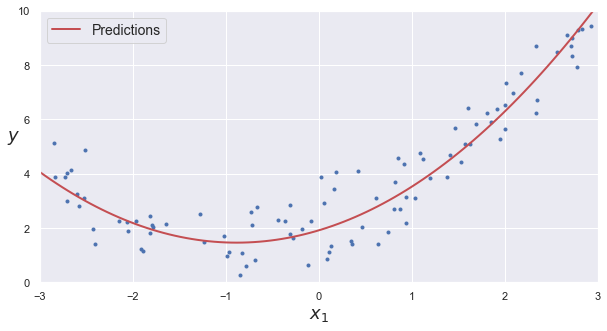

In [14]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.figure(figsize=(10,5))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

In [15]:
# plot learning curve
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.figure(figsize=(10,5))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()
    return

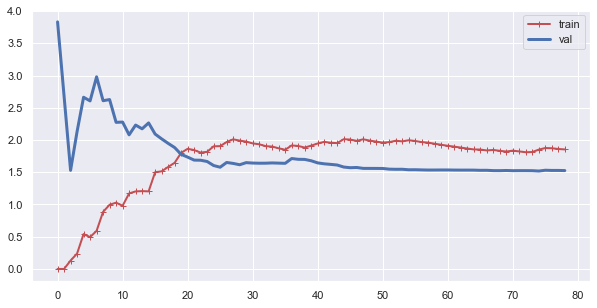

In [16]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

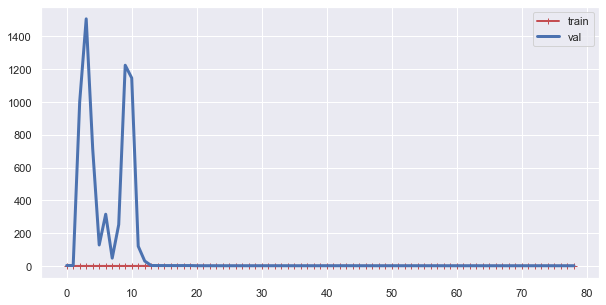

In [17]:
polynomial_regression = Pipeline([("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                                  ("lin_reg", LinearRegression())])
plot_learning_curves(polynomial_regression, X, y)

In [18]:
# Ridge regression using closed form solution
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [19]:
ridge_reg.predict([[1.5]])

array([[5.11960926]])

In [20]:
# Ridge regression using stochastic gradient descent
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.120683])

In [21]:
# Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.07543693])

In [22]:
# Elastic Net Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.07556155])

In [23]:
# prepare training data and validation for early stopping
np.random.seed(42)
m = 10000
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [24]:
# Early Stopping with SGD Regressor

# prepare the data
poly_scaler = Pipeline([("poly_features", PolynomialFeatures(degree=90, include_bias=False)),("std_scaler", StandardScaler())])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# warm_start=True, when the fit() method is called, it just continues training where it left off 
# instead of restarting from scratch
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

n_epoch = 1000
for epoch in range(n_epoch):
    print(f"\r running epoch {epoch}/{n_epoch}",end='')
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        
        # clone best with learned parameters without actually copy data on which it is fitted
        best_model = clone(sgd_reg)

 running epoch 999/1000

In [25]:
best_epoch

167

In [26]:
# Load iris data for classification
iris = datasets.load_iris()
X = iris["data"]
y = iris["target"] 

In [27]:
X.shape,y.shape

((150, 4), (150,))

In [28]:
# softmax regression
softmax_reg = LogisticRegression(multi_class="multinomial", max_iter=1000, C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
softmax_reg.predict([[5, 2,3,1]])

array([1])

In [30]:
softmax_reg.predict_proba([[5, 2,3,1]])

array([[4.64165612e-02, 9.53559186e-01, 2.42525673e-05]])